In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crime-against-women-20012014-india/crimes_against_women_2001-2014.csv


In [2]:
data= pd.read_csv("../input/crime-against-women-20012014-india/crimes_against_women_2001-2014.csv")

In [3]:
data.head()

,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0


In [4]:
data["STATE/UT"].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY',
       'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'A&N Islands', 'Chandigarh', 'D&N Haveli',
       '

In [5]:
import matplotlib.pyplot as plt

In [6]:
data= data.drop(columns= "Unnamed: 0")

In [7]:
data["STATE/UT"]=data.apply(lambda x: x["STATE/UT"].replace(" ","").lower(),axis=1)


In [8]:

data["STATE/UT"].replace("delhiut", "delhi", inplace=True)

In [9]:
data["STATE/UT"].unique()


array(['andhrapradesh', 'arunachalpradesh', 'assam', 'bihar',
       'chhattisgarh', 'goa', 'gujarat', 'haryana', 'himachalpradesh',
       'jammu&kashmir', 'jharkhand', 'karnataka', 'kerala',
       'madhyapradesh', 'maharashtra', 'manipur', 'meghalaya', 'mizoram',
       'nagaland', 'odisha', 'punjab', 'rajasthan', 'sikkim', 'tamilnadu',
       'tripura', 'uttarpradesh', 'uttarakhand', 'westbengal',
       'a&nislands', 'chandigarh', 'd&nhaveli', 'daman&diu', 'delhi',
       'lakshadweep', 'puducherry', 'telangana'], dtype=object)

In [10]:
data.isnull().sum()

STATE/UT                                               0
DISTRICT                                               0
Year                                                   0
Rape                                                   0
Kidnapping and Abduction                               0
Dowry Deaths                                           0
Assault on women with intent to outrage her modesty    0
Insult to modesty of Women                             0
Cruelty by Husband or his Relatives                    0
Importation of Girls                                   0
dtype: int64

In [11]:
data.columns

Index(['STATE/UT', 'DISTRICT', 'Year', 'Rape', 'Kidnapping and Abduction',
       'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls'],
      dtype='object')

In [12]:
columns=["Rape", 'Kidnapping and Abduction',
       'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls']

In [13]:
df1=pd.DataFrame()
for i in columns:
    df1[i]= data.groupby(["Year"])[i].sum()

In [14]:
df1

,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
Year,,,,,,,
2001,32150,29290,13702,68248,19492,98340,228
2002,32746,29012,13644,67886,20310,98474,152
2003,31694,26592,12416,65878,24650,101406,92
2004,36466,31156,14052,69134,20002,116242,178
2005,36718,31500,13574,68350,19968,116638,298
2006,38696,34828,15236,73234,19932,126256,134
2007,41474,40832,16186,77468,21900,151860,122
2008,42934,45878,16344,80826,24428,162688,134
2009,42794,51482,16766,77422,22018,179092,96


In [15]:
df1["Total"]=df1.sum(axis=1)

In [16]:
df1

,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,Total
Year,,,,,,,,
2001,32150,29290,13702,68248,19492,98340,228,261450
2002,32746,29012,13644,67886,20310,98474,152,262224
2003,31694,26592,12416,65878,24650,101406,92,262728
2004,36466,31156,14052,69134,20002,116242,178,287230
2005,36718,31500,13574,68350,19968,116638,298,287046
2006,38696,34828,15236,73234,19932,126256,134,308316
2007,41474,40832,16186,77468,21900,151860,122,349842
2008,42934,45878,16344,80826,24428,162688,134,373232
2009,42794,51482,16766,77422,22018,179092,96,389670


In [17]:
df1.columns

Index(['Rape', 'Kidnapping and Abduction', 'Dowry Deaths',
       'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls', 'Total'],
      dtype='object')

In [18]:
columns_df1=['Rape', 'Kidnapping and Abduction', 'Dowry Deaths',
       'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls', 'Total']

In [19]:
length= len(columns_df1)

In [20]:
length

8

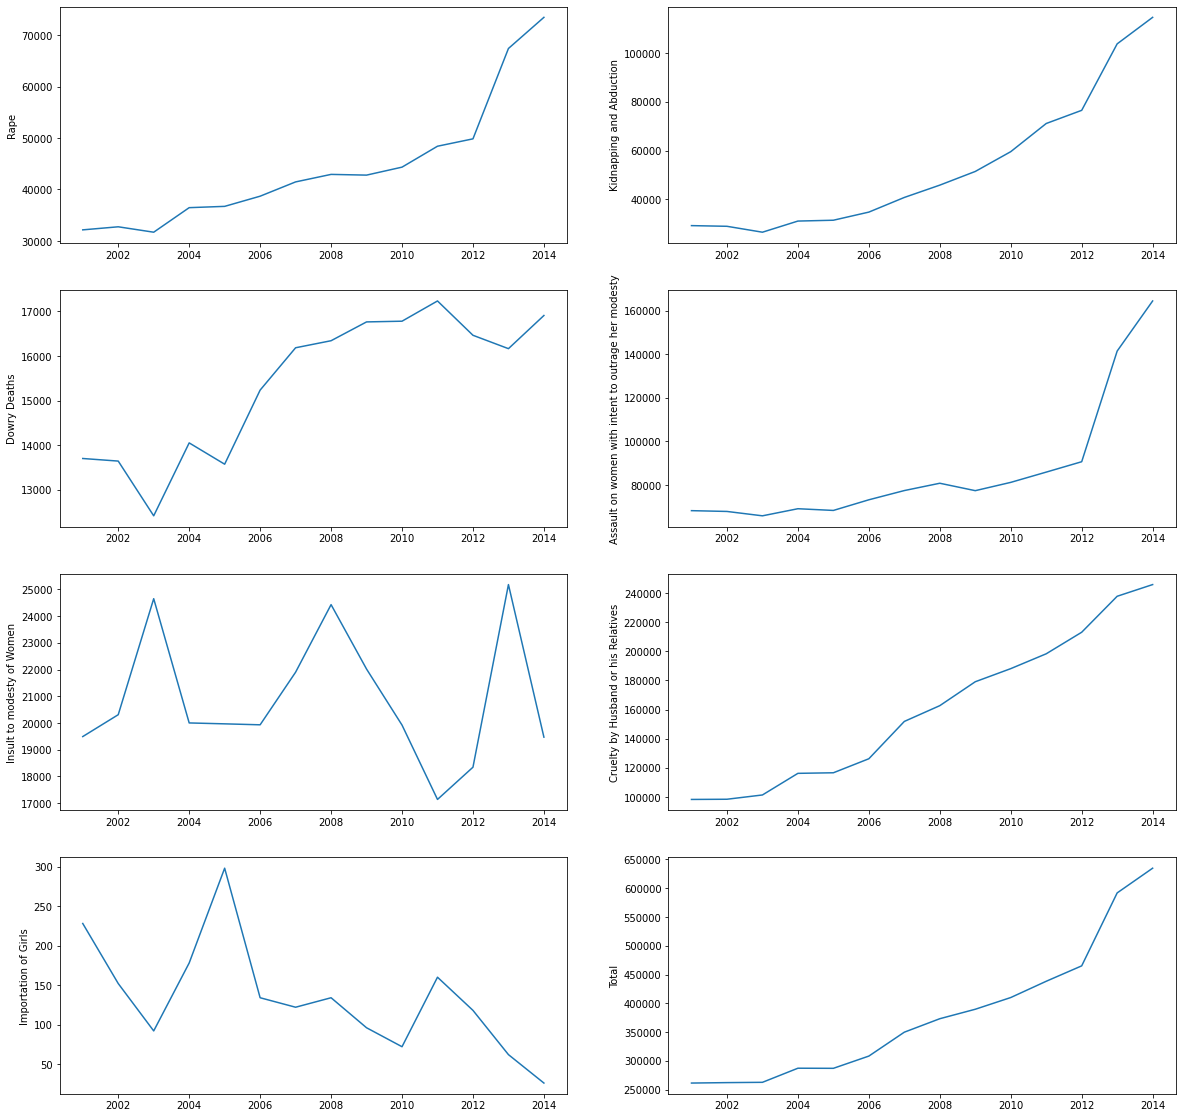

In [21]:
plt.figure(figsize=(20,20))
plt.xlabel("Year")
for j in range(length):
    plt.subplot(4,2,j+1)
    plt.plot(df1.index,df1[columns_df1[j]])
    plt.ylabel(columns_df1[j])
    


In [22]:
x=df1.sum(axis=0)

In [23]:
x

Rape                                                    619158
Kidnapping and Abduction                                746198
Dowry Deaths                                            215480
Assault on women with intent to outrage her modesty    1212258
Insult to modesty of Women                              292756
Cruelty by Husband or his Relatives                    2233888
Importation of Girls                                      1872
Total                                                  5321610
dtype: int64

In [24]:
df2=pd.DataFrame(columns=["Crime","Total"])

for i in range(length-1):
    df2= df2.append({"Crime":columns_df1[i], "Total":x[i]},ignore_index=True )

In [25]:
df2

,Crime,Total
0,Rape,619158
1,Kidnapping and Abduction,746198
2,Dowry Deaths,215480
3,Assault on women with intent to outrage her mo...,1212258
4,Insult to modesty of Women,292756
5,Cruelty by Husband or his Relatives,2233888
6,Importation of Girls,1872


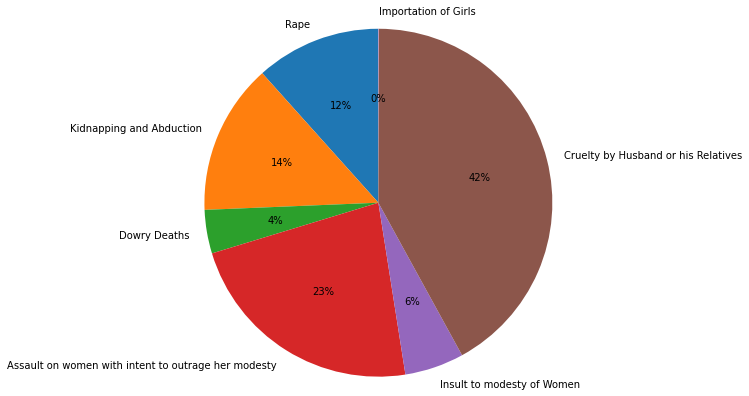

In [26]:
plt.pie(df2["Total"],labels=df2["Crime"],startangle=90,radius=2,autopct='%.0f%%')

plt.show()

In [27]:
df1.head()

,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,Total
Year,,,,,,,,
2001,32150,29290,13702,68248,19492,98340,228,261450
2002,32746,29012,13644,67886,20310,98474,152,262224
2003,31694,26592,12416,65878,24650,101406,92,262728
2004,36466,31156,14052,69134,20002,116242,178,287230
2005,36718,31500,13574,68350,19968,116638,298,287046


In [28]:
df3= df1.drop(columns= "Total")
data2001= df3.loc[2001]
data2014=df3.loc[2014]

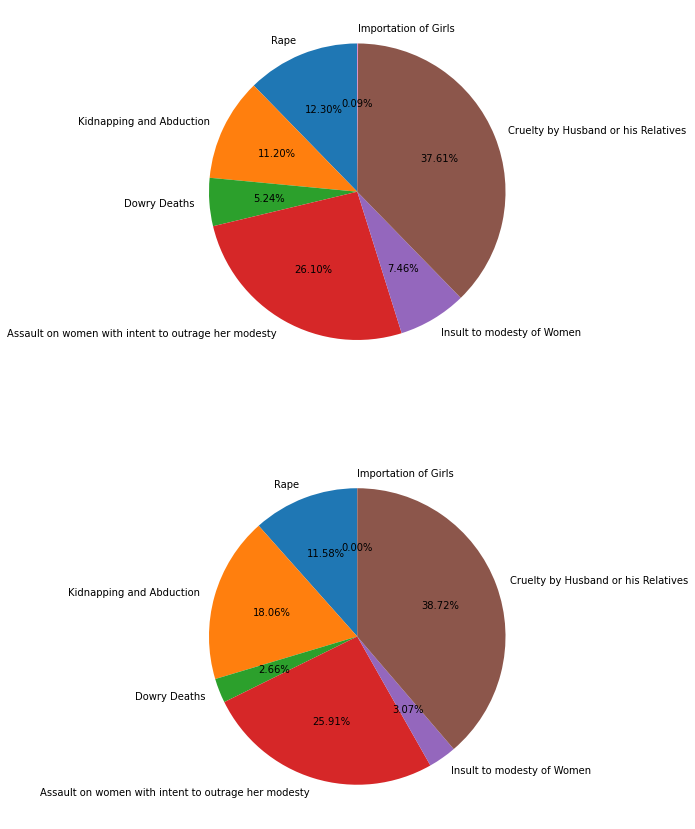

In [29]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
plt.pie(data2001,labels=columns,autopct="%.2f%%",startangle=90)
plt.subplot(2,1,2)
plt.pie(data2014,labels=columns,autopct="%.2f%%",startangle=90)
plt.show()

In [30]:
df4=pd.DataFrame()
for i in columns:
    df4[i]= data.groupby(["STATE/UT"])[i].sum()

In [31]:
df4

,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
STATE/UT,,,,,,,
a&nislands,336,212,20,600,112,288,0
andhrapradesh,32150,34504,13844,126952,86964,280906,34
arunachalpradesh,1316,1470,6,1996,48,476,0
assam,40190,62074,3268,38256,254,115300,22
bihar,30758,57086,32206,16958,694,69770,904
chandigarh,770,1682,90,1088,342,2080,0
chhattisgarh,29308,11808,2758,47096,3968,23436,12
d&nhaveli,132,224,2,106,12,90,0
daman&diu,60,44,6,40,4,76,0


In [32]:
df4["Total"]=df4.sum(axis=1)

In [33]:
df4.shape

(36, 8)

In [34]:
df4.index[0]

'a&nislands'

In [35]:
import seaborn as sns

In [36]:
df4=df4.sort_values(by="Total", ascending= False)

In [37]:
df4

,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,Total
STATE/UT,,,,,,,,
uttarpradesh,51150,135906,57256,91212,53130,193738,6,582398
andhrapradesh,32150,34504,13844,126952,86964,280906,34,575354
westbengal,47876,61158,12308,66908,5348,344124,254,537976
rajasthan,45684,66278,11854,83362,794,262200,14,470186
madhyapradesh,90996,35608,21090,195478,20964,102816,134,467086
maharashtra,48974,30368,9696,114704,32634,193202,6,429584
assam,40190,62074,3268,38256,254,115300,22,259364
kerala,20030,4452,700,80438,7930,111626,0,225176
gujarat,11644,34670,1108,23186,3230,146468,0,220306


In [38]:
import plotly.express as px


In [39]:
plt.figure(figsize=(20,20))
px.bar(df4,x=df4.index,y="Total")

<Figure size 1440x1440 with 0 Axes>

In [40]:
df4.head(3)

,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,Total
STATE/UT,,,,,,,,
uttarpradesh,51150,135906,57256,91212,53130,193738,6,582398
andhrapradesh,32150,34504,13844,126952,86964,280906,34,575354
westbengal,47876,61158,12308,66908,5348,344124,254,537976


In [41]:
df4.tail(3)

,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,Total
STATE/UT,,,,,,,,
d&nhaveli,132,224,2,106,12,90,0,566
daman&diu,60,44,6,40,4,76,0,230
lakshadweep,20,2,0,14,4,14,0,54


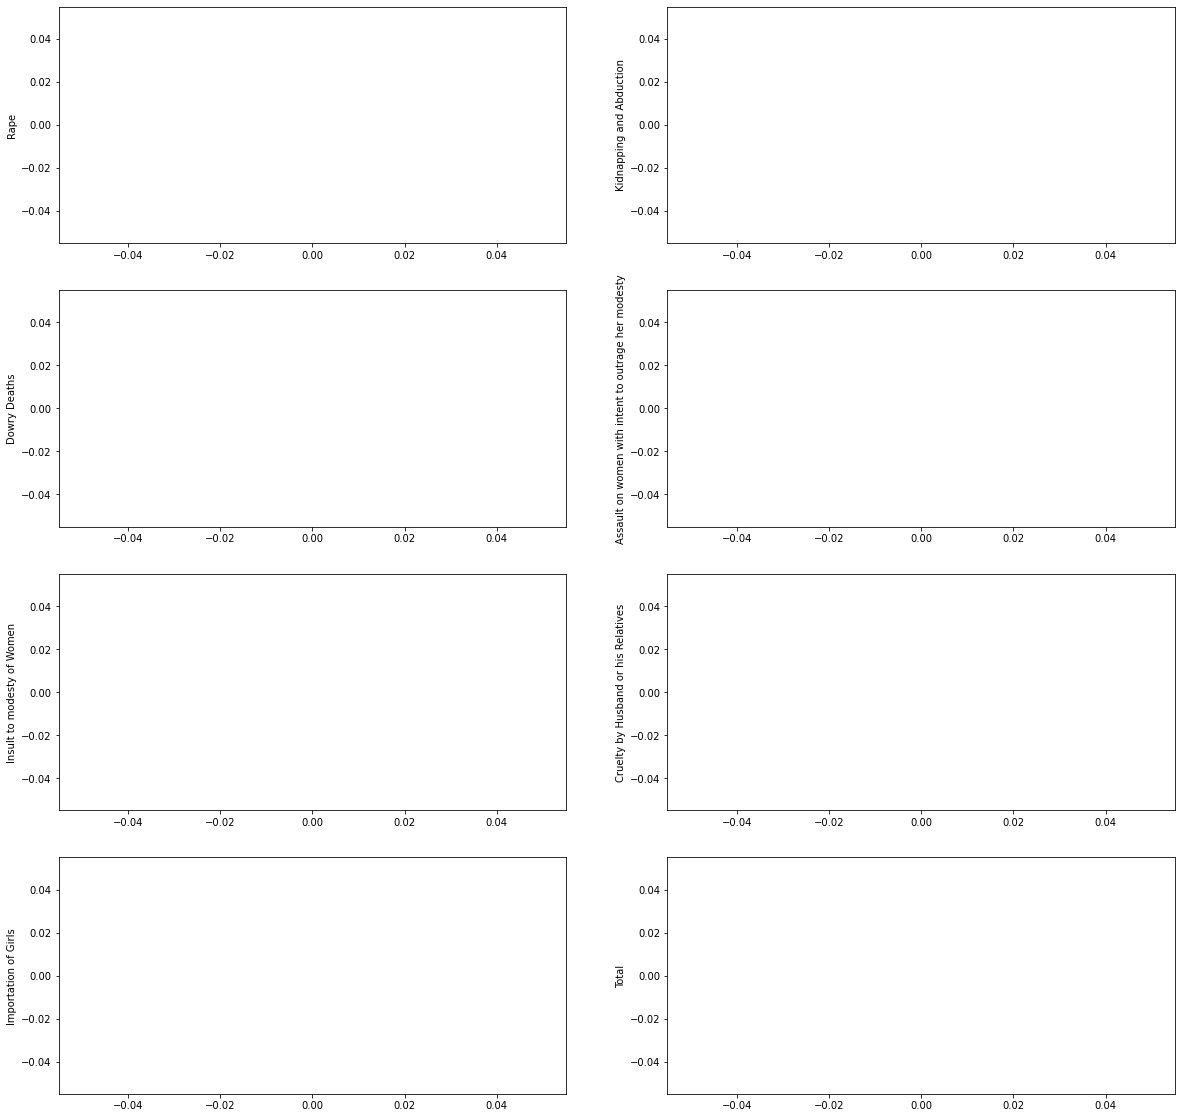

In [42]:
df5=data.loc[data["STATE/UT"]=="uttar pradesh"]
df_up=pd.DataFrame()
for i in columns:
    df_up[i]= df5.groupby(["Year"])[i].sum()
df_up["Total"]=df_up.sum(axis=1)
plt.figure(figsize=(20,20))
plt.xlabel("Year")
for j in range(length):
    plt.subplot(4,2,j+1)
    plt.plot(df_up.index,df_up[columns_df1[j]])
    plt.ylabel(columns_df1[j])
    

In [43]:
df_up_pie=pd.DataFrame(columns=["Crime","Total"])
x_up=df_up.sum(axis=0)
for i in range(length-1):
    df_up_pie= df_up_pie.append({"Crime":columns_df1[i], "Total":x_up[i]},ignore_index=True )
df_up_pie

,Crime,Total
0,Rape,0.0
1,Kidnapping and Abduction,0.0
2,Dowry Deaths,0.0
3,Assault on women with intent to outrage her mo...,0.0
4,Insult to modesty of Women,0.0
5,Cruelty by Husband or his Relatives,0.0
6,Importation of Girls,0.0


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning:

normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 



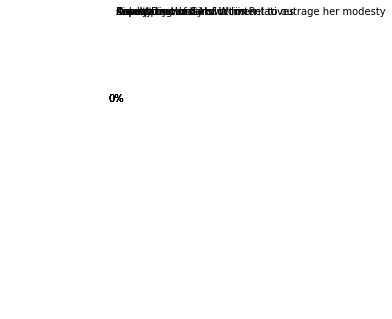

In [44]:
plt.pie(df_up_pie["Total"],labels=df_up_pie["Crime"],startangle=90,radius=2,autopct='%.0f%%')
plt.show()

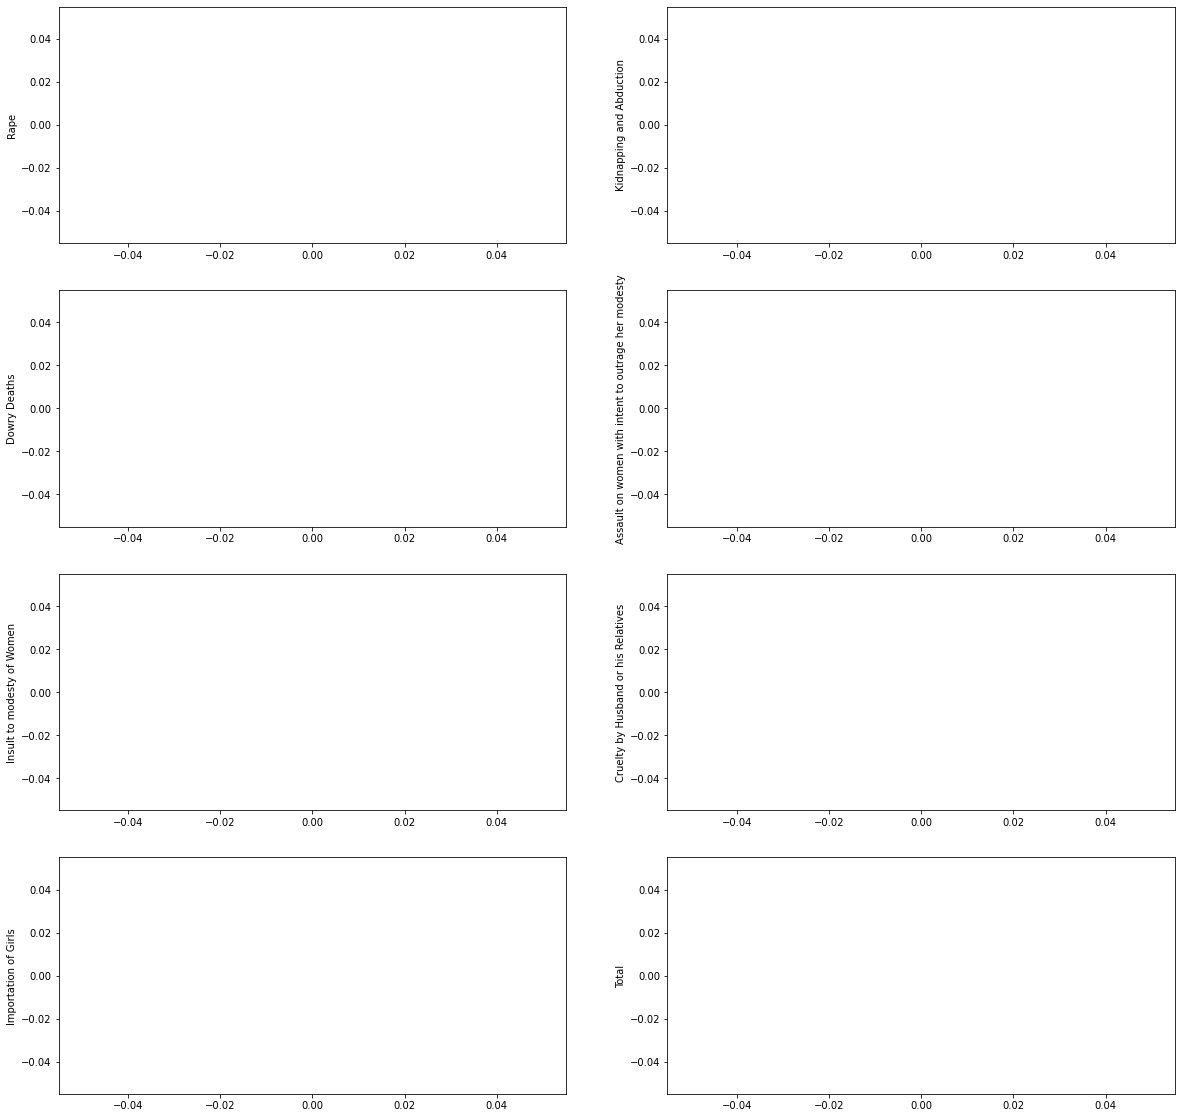

In [45]:
df6=data.loc[data["STATE/UT"]=="west bengal"]
df_ap=pd.DataFrame()
for i in columns:
    df_ap[i]= df6.groupby(["Year"])[i].sum()
df_ap["Total"]=df_ap.sum(axis=1)
plt.figure(figsize=(20,20))
plt.xlabel("Year")
for j in range(length):
    plt.subplot(4,2,j+1)
    plt.plot(df_ap.index,df_ap[columns_df1[j]])
    plt.ylabel(columns_df1[j])

In [46]:
df_ap

,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,Total
